In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [2]:
# load the dataset
filepath = "kc_house_data.csv"
df = pd.read_csv(filepath)

In [3]:
# first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# datatypes for all columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# drop the id column
df.drop("id",axis=1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# look for missing values
print("Missing Values")
for column in df.columns:
    print(f"{column} = {df[column].isnull().sum()}")

Missing Values
date = 0
price = 0
bedrooms = 0
bathrooms = 0
sqft_living = 0
sqft_lot = 0
floors = 0
waterfront = 0
view = 0
condition = 0
grade = 0
sqft_above = 0
sqft_basement = 0
yr_built = 0
yr_renovated = 0
zipcode = 0
lat = 0
long = 0
sqft_living15 = 0
sqft_lot15 = 0


In [7]:
# count the number of houses with unique floor values
df["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<AxesSubplot:xlabel='waterfront', ylabel='price'>

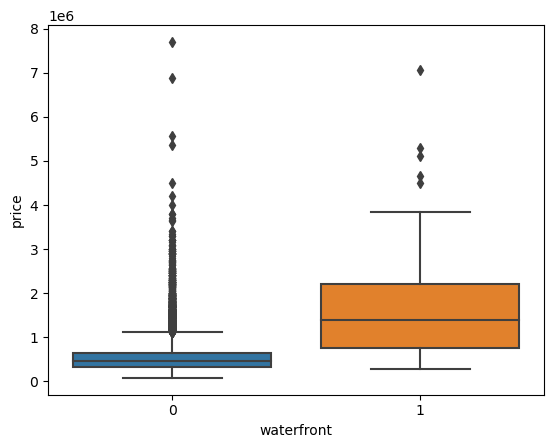

In [8]:
# Correlation between houses with a waterfront view and price 
# no waterfront = 0
# waterfront =  1

sns.boxplot(data=df,x="waterfront",y="price")

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

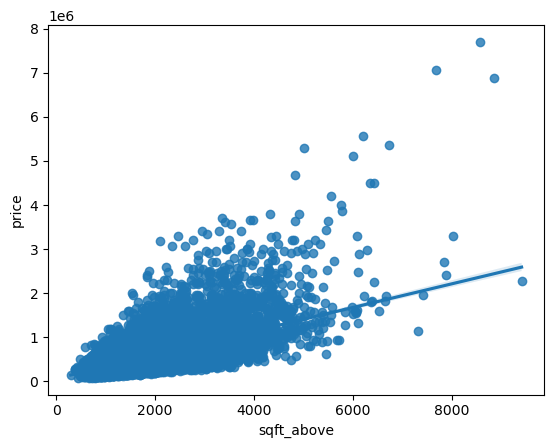

In [9]:
# sqft_above: Square footage of house apart from basement
# correlation between square footage and price
sns.regplot(data=df,x="sqft_above",y="price")

In [10]:
print("It shows a positive relation")

It shows a positive relation


In [11]:
# correlation with other features
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [12]:
print("sqft_living shows a pearson coefficent of 0.702035 which indicates moderate positive relation with price")

sqft_living shows a pearson coefficent of 0.702035 which indicates moderate positive relation with price


In [13]:
# linear regression model to predict the 'price' using the feature 'sqft_living'

# get the features
X = df[["sqft_living"]]
Y =  df['price']

# fit the model
linear_reg = LinearRegression().fit(X,Y)

In [14]:
# get the R^2 score
print(f"The R^2 score is {linear_reg.score(X,Y)}")


The R^2 score is 0.4928532179037931


In [15]:
# create a multiple linear regression to predict price

# each feature has a pearson coefficent > 0.25
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]

# fit the model
linear_reg = LinearRegression().fit(X,Y)

In [16]:
# get the R^2 score
print(f"The R^2 score is {linear_reg.score(X,Y)}")

The R^2 score is 0.6577151058279331


In [17]:
# create a polynomial regression model using pipelining

Input=[
    ('scale',StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model',LinearRegression())
]

# create pipeline
pipeline = Pipeline(Input)

# fit pipeline
pipeline.fit(X,Y)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [18]:
# get the R^2 score
print(f"The R^2 score is {pipeline.score(X,Y)}")

The R^2 score is 0.7513468418265049


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [20]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [21]:
# create a ridge regression
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=0.1)
ridge_regression.fit(x_train,y_train)

Ridge(alpha=0.1)

In [22]:
# get the R^2 score
print(f"The R^2 score is {ridge_regression.score(x_test,y_test)}")

The R^2 score is 0.6480374087702243


In [23]:
# create a ridge regression with feature transformation
# feature transform for second degree polynomial
pf = PolynomialFeatures(degree=2)
x_train_transform = pf.fit_transform(x_train)
x_test_transform = pf.fit_transform(x_test)

In [24]:
# create a ridge regression
ridge_regression2 = Ridge(alpha=0.1)
ridge_regression2.fit(x_train_transform,y_train)

Ridge(alpha=0.1)

In [25]:
# get the R^2 score
print(f"The R^2 score is {ridge_regression2.score(x_test_transform,y_test)}")

The R^2 score is 0.7004432066573696
